In [2]:
from google.colab import files
data_to_load = files.upload()

Saving NetflixViewingHistory (1).csv to NetflixViewingHistory (1).csv


### **Import Libraries**

In [212]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
print("Imported Libraries")

Imported Libraries


### **Explore Dataframe**

In [167]:
df = pd.read_csv("NetflixViewingHistory (1).csv")
print(df.head(5))

                                               Title        Date
0   Modern Family: Season 6: Queer Eyes, Full Hearts  2020-08-01
1  Modern Family: Season 6: Halloween 3: AwesomeLand  2020-08-01
2  Modern Family: Season 6: Won't You Be Our Neig...  2020-08-01
3         The Office (U.S.): Season 1: Diversity Day  2020-07-31
4       Brooklyn Nine-Nine: Season 4: The Overmining  2020-07-31


In [168]:
print("Colums: ", df.columns.to_list())
print("Total Number of records:" ,len(df))
print("Number of Null Value: ", df.isnull().sum().sum())

Colums:  ['Title', 'Date']
Total Number of records: 1777
Number of Null Value:  0


### **Estimating total money spent on Netflix**

In [169]:
cost_months = 9.9
start = df.iloc[-1]['Date']
end = df.iloc[0]['Date']
print("Start Date: ", start)
print("End Date: " , end)

# Convert to Datetime object to get the difference in months
start = datetime.strptime(start, '%Y-%m-%d')
end = datetime.strptime(end, '%Y-%m-%d')
duration_months = (end.year - start.year)*12 + (end.month - start.month)
print("Total number of months: " , duration_months)

# Cost
print("Total Cost: {}$".format(cost*duration_months))

Start Date:  2018-05-13
End Date:  2020-08-01
Total number of months:  27
Total Cost: 267.3$


### **Number of days out of last 3 years spent on Netflix**

In [170]:
number_of_days = df['Date'].nunique()
total_number_of_days = (end - start).days
print("I signed up for Netflix {} days ago and I used it for {} days".format(total_number_of_days , number_of_days))
print("Therfore I ended up using only {:.2f}% of my subscription".format(number_of_days*100/total_number_of_days))

I signed up for Netflix 811 days ago and I used it for 321 days
Therfore I ended up using only 39.58% of my subscription


### **Separate dataframe into movies and tv shows**

In [222]:
# Get datframe with columns having ": Season" in their Title
df_tv = df[(df['Title'].str.contains(": Season"))] 
df_movies = df[~df['Title'].str.contains(": Season")]
print("TV Shows")
print(df_tv.head(5)['Title'].values)
print('\n')
print("Movies")
print(df_movies.head(5)['Title'].values)

TV Shows
['Modern Family: Season 6: Queer Eyes, Full Hearts'
 'Modern Family: Season 6: Halloween 3: AwesomeLand'
 "Modern Family: Season 6: Won't You Be Our Neighbor"
 'The Office (U.S.): Season 1: Diversity Day'
 'Brooklyn Nine-Nine: Season 4: The Overmining']


Movies
['Blockers' 'Penalty' "We're the Millers" 'Hot Pursuit'
 'Once Upon a Time in the West']


### **Total Number of unique movies I have watched**

In [221]:
number_of_unique_movies = df_movies['Title'].nunique()
print("Number of unique movies: ",number_of_unique_movies)

Number of unique movies:  337


### **Separating date to day , Month and year**

In [196]:
def splitDate( date):
    data = date.ctime().split(' ')
    day_name = data[0]
    month = data[1]
    day_num = data[2] if data[2] != '' else data[3]
    year = data[-1]
    return day_name , month , day_num , year

try:
    df_movies['day_name'] , df_movies['month'] , df_movies['day_num'] , df_movies['year'] = zip(*df_movies.apply(lambda  x : splitDate(datetime.strptime(x['Date'], '%Y-%m-%d') ) , axis=1 ))
    del df_movies['Date']
except:
    pass
print(df_movies.head(5))

                            Title day_name month day_num  year
35                       Blockers      Fri   Jul      24  2020
36                        Penalty      Fri   Jul      24  2020
63              We're the Millers      Sat   Jul      18  2020
70                    Hot Pursuit      Fri   Jul      17  2020
115  Once Upon a Time in the West      Sat   Jul      11  2020


['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] [39, 59, 67, 38, 32, 47, 56]


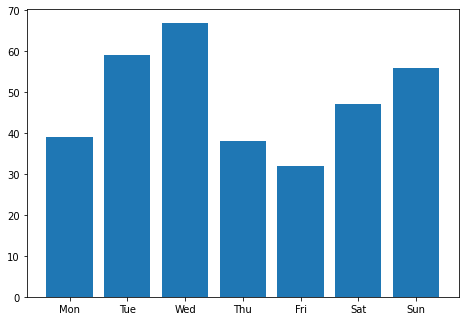

In [216]:
movie_day_frequency = df_movies['day_name'].value_counts()
fig = plt.figure()
x = ['Mon' , 'Tue' , 'Wed' , 'Thu' , 'Fri' , 'Sat' , 'Sun']
y = [ movie_day_frequency[day] for day in x]
print( x ,y)
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
plt.show()